In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Load the uploaded dataset
df = pd.read_csv("/content/fake_jobs.csv")  # Make sure the path is correct for your environment

# Show first few rows
df.head()


,title_length,description_length,has_company_profile,is_fake
0,72,740,1,yes
1,95,476,0,no
2,60,662,1,yes
3,34,317,0,no
4,67,884,0,yes


In [7]:
# Convert 'is_fake' column from 'yes'/'no' to 1/0 for classification
df['is_fake'] = df['is_fake'].map({'yes': 1, 'no': 0})

# Define feature columns and target column
X = df[['title_length', 'description_length', 'has_company_profile']]
y = df['is_fake']


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display results
print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))


Accuracy: 0.5
Precision: 0.62
Recall: 0.42


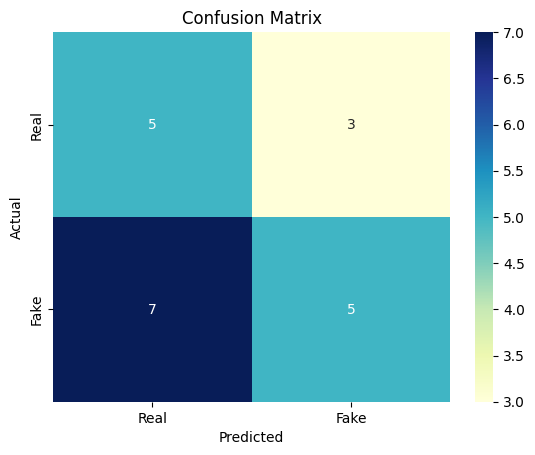

In [11]:
# Create and display confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
